In [8]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_table('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale',
              sep=r'\s+\d+:', engine='python', header=None).loc[:,:]

In [57]:
df

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [59]:
df.isnull().sum() 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    9
dtype: int64

In [60]:
df.fillna(0, inplace=True)

In [61]:
#Importing train_test_split from sklearn library

from sklearn.model_selection import train_test_split



X=df.loc[:,1:]
X
y= df.iloc[:,0]
y




0     -1
1      1
2     -1
3      1
4     -1
      ..
763    1
764    1
765    1
766   -1
767    1
Name: 0, Length: 768, dtype: int64

<AxesSubplot:xlabel='0', ylabel='count'>

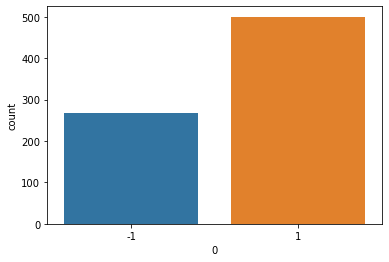

In [110]:
import seaborn as sns


sns.countplot(x=y)

In [94]:
# TRAIN and TEST SPLIT
def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=2)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (537, 8)
y_train shape:  (537,)
X_test shape:  (231, 8)
y_test shape:  (231,)


In [95]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

Perceptron(random_state=42)

In [96]:
y_pred= p.predict(X_test)

In [97]:
for i in range(len(y_test)):
    print("expected -",y_test.iloc[i],"predicted - ",y_pred[i])

expected - 1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  -1
expected - -1 predicted -  -1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  -1
expected - 1 predicted -  -1
expected - -1 predicted -  -1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - 1 predicted -  1
expected - -1 predicted -  1
expected - -1 predicted -  -1
expected - 1 predicted -  1
expected - 1 predicted -  1
expected - 1 predicted -  1
e

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7272727272727273

Lets implement our own percepron 

In [253]:

N=X_train.columns

global weights
weights= np.random.randint(N)# initialize weights to zero
           
def pcr_predict(inputs):
        # predicts the label of one training example input with current weights
        #print("inputs , self.weights",inputs,self.weights[0:])
        summation = np.dot(inputs, weights[0:]) 
        #print("summation",summation)
        if summation > 0:
            activation = 1
        else:
            activation = -1            
        return activation

def pcr_train(train_inputs, labels,epoch=50,rate=0.09):
    # trains perceptron weights on training dataset
    global weights
    labels = np.expand_dims(labels, axis=1)
    data = np.hstack((train_inputs.values,labels))
        #print("lables",labels)
        #print("data",data)
    for row in data:
        inputs = row[:-1]
        label = row[-1]
        prediction = pcr_predict(inputs)
        #print("prediction",prediction)
        #weights[0:] += 
        #print(type(weights))
        weights = ((rate * (label - prediction) * inputs))
        print("weights",weights)
        #self.weights[0] += 
        #print("weigths2",rate * (label - prediction))
    return weights
        

def pcr_evaluate(test_inputs, labels):
    # calculates average prediction error on testing dataset
    errors = []
    predict=[]
    for inputs, label in zip(test_inputs, labels):
        prediction = pcr_predict(inputs)
        predict.append(prediction)
        errors.append(np.abs(label-prediction))
            #print(errors)
    return predict



pcr_train(X_train,y_train)

weights [-0.11647062 -0.02804022  0.03245904 -0.0636363  -0.18        0.01958274
 -0.15094782 -0.13800006]
weights [-0.  0.  0. -0. -0. -0.  0. -0.]
weights [ 0.03176478 -0.01356784  0.00295081 -0.18       -0.18       -0.04104324
 -0.16631946 -0.12000006]
weights [ 0.13764708 -0.1058292  -0.0855738   0.18        0.18        0.010462
  0.06824934 -0.09      ]
weights [ 0.03176478  0.0714573   0.0560655  -0.18       -0.18       -0.034605
  0.02951316  0.036     ]
weights [ 0.05294124 -0.06241212 -0.02655738  0.09636372  0.12468078 -0.00992551
  0.10867626  0.13199994]
weights [-0. -0.  0. -0. -0. -0. -0. -0.]
weights [-0.15882354 -0.05155776  0.05016402  0.00181818 -0.16085106 -0.00187778
 -0.12712212 -0.18      ]
weights [-0.01058823 -0.05517594 -0.02655738  0.18        0.18       -0.00348734
  0.09176778  0.036     ]
weights [-0.15882354  0.02261304  0.03245904 -0.07090902 -0.10510632  0.00456037
 -0.11082834 -0.15600006]
weights [ 0.13764708 -0.0334674  -0.0560655   0.18        0.18  

array([-0.,  0.,  0., -0., -0., -0., -0., -0.])

In [254]:
y_predic = pcr_evaluate(X_test.values,y_test)
accuracy_score(y_test,y_predic)

0.329004329004329